#  Unit 4.3a Parallel Computing
> Observe an algorithm using parallel computing in Python Code.  Monitor processes on host.
- toc: true
- image: /images/python.png
- categories: []
- type: ap
- week: 28

## Analyzing Parallel Computing
> Once again we will use image lab, this time to review Parallel Computing.
- Change baseWidth in this line in code to increase computation requirements: ```def process_image(image, baseWidth=512):```  For instance 320, 512, 1024, 2048, 4096.
- Compare Sequential and Parallel computing code and time to achieve outputs

In [22]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as PIL Image is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np


# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Internet", 'label': "Green Square", 'file': "green-square-16.png"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "clouds-impression.png"},
            {'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

# Scale to baseWidth
def scale_image(img, baseWidth):
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

# PIL image converted to base64
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()
    
# Convert pixels to Grey Scale
def grey_pixel(pixel):
    average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
    if len(pixel) > 3:
        return( (average, average, average, pixel[3]) ) # PNG format
    else:
        return( (average, average, average) )
    
# Convert pixels to Red Scale
def red_pixel(pixel):
    if len(pixel) > 3:
        return( (pixel[0], 0, 0, pixel[3]) ) # PNG format
    else:
        return( (pixel[0], 0, 0) )
    
# Convert pixels to Red Scale
def green_pixel(pixel):
    if len(pixel) > 3:
        return( (0, pixel[1], 0, pixel[3]) ) # PNG format
    else:
        return( (0, pixel[1], 0) )
    
# Convert pixels to Red Scale
def blue_pixel(pixel):
    if len(pixel) > 3:
        return( (0, 0, pixel[2], pixel[3]) ) # PNG format
    else:
        return( (0, 0, pixel[2]) )
        
# Set Properties of Image, Scale, and convert to Base64
def image_management(image, baseWidth):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img, baseWidth)
    image['pil'] = img
    image['scaled_size'] = img.size
    image['numpy'] = np.array(img.getdata())
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    
    # Grey HTML
    # each pixel in numpy array is turned to grey 
    # then resulting list, using List Comprehension, is put back into img    
    img.putdata([grey_pixel(pixel) for pixel in image['numpy']])
    image['html_grey'] =  '<img src="data:image/png;base64,%s">' % image_to_base64(img, image['format'])
    
    # Red HTML
    img.putdata([red_pixel(pixel) for pixel in image['numpy']])
    image['html_red'] =  '<img src="data:image/png;base64,%s">' % image_to_base64(img, image['format'])
    
    # Green HTML
    img.putdata([green_pixel(pixel) for pixel in image['numpy']])
    image['html_green'] =  '<img src="data:image/png;base64,%s">' % image_to_base64(img, image['format'])
    
    # Blue HTML
    img.putdata([blue_pixel(pixel) for pixel in image['numpy']])
    image['html_blue'] =  '<img src="data:image/png;base64,%s">' % image_to_base64(img, image['format'])
    
    
def process_image(image, baseWidth=320):
    image_management(image, baseWidth)
    print("---- meta data -----")
    print(image['label'])
    print(image['source'])
    print(image['format'])
    print(image['mode'])
    print("Original size: ", image['size'])
    print("Scaled size: ", image['scaled_size'])
    
    print("-- images --")
    display(HTML(image['html'])) 
    display(HTML(image['html_grey'])) 
    display(HTML(image['html_red'])) 
    display(HTML(image['html_green'])) 
    display(HTML(image['html_blue'])) 


## Sequential Processing 
> The for loop iterates over the list of images and processes them one at a time, in order.

---- meta data -----
Green Square
Internet
PNG
RGBA
Original size:  (16, 16)
Scaled size:  (320, 320)
-- images --



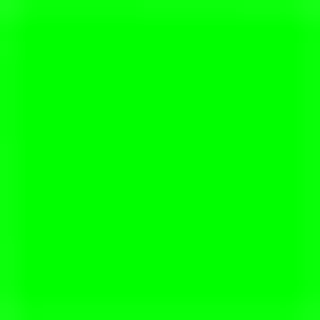


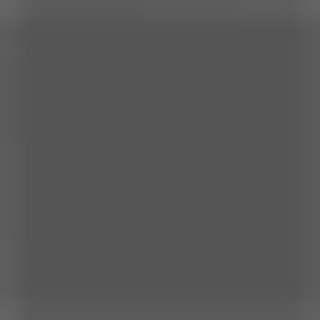


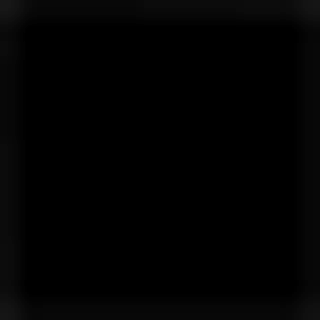


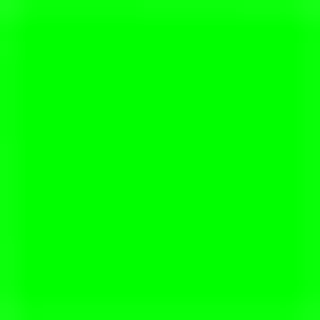


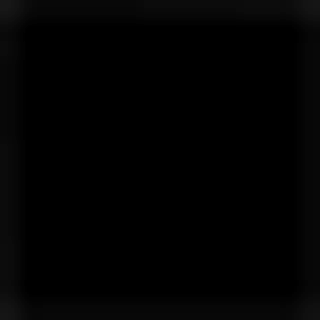

---- meta data -----
Clouds Impression
Peter Carolin
PNG
RGBA
Original size:  (320, 234)
Scaled size:  (320, 234)
-- images --



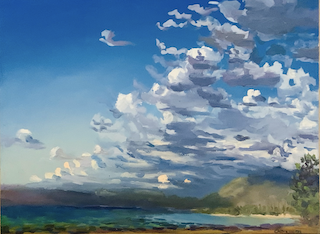


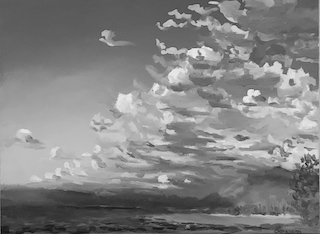


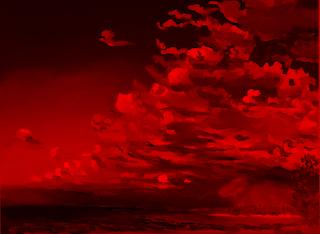


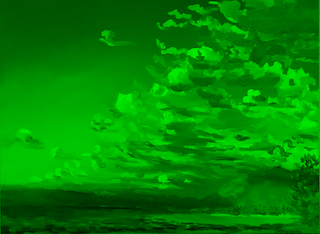


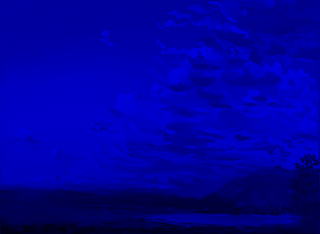

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
Original size:  (2792, 2094)
Scaled size:  (320, 240)
-- images --



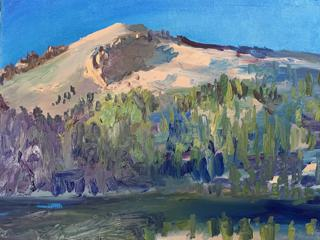


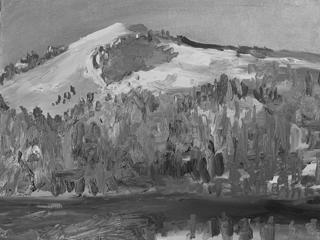


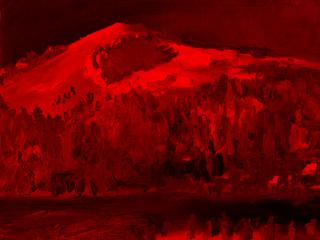


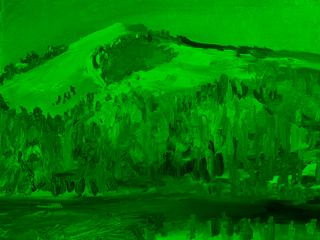


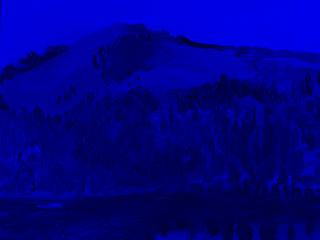

In [23]:
# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # setup default images
    images = image_data()

    # Sequential Processing    
    for image in images:
        process_image(image)
        
    print()

## Parallel Computing

 > In parallel or concurrent mode, the ThreadPoolExecutor is used to submit each image to a separate worker thread, allowing multiple images to be processed simultaneously. Multithreading allows multiple concurrent tasks of a process at the same time. The executor.map() method is used to apply the process_image function to each image in the images list.  
 - The order in which the images are processed is not guaranteed, as threads are performed simultaneously.

---- meta data -----
Green Square
Internet
PNG
RGBA
Original size:  (16, 16)
Scaled size:  (320, 320)
-- images --



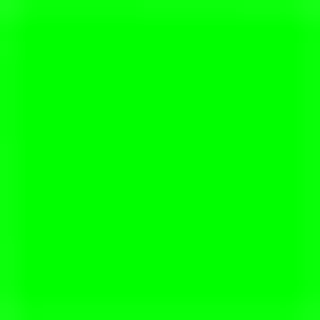


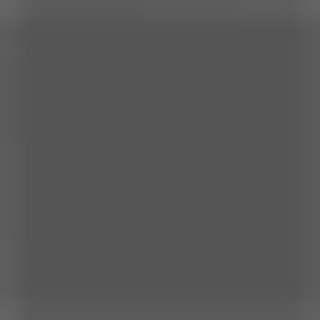


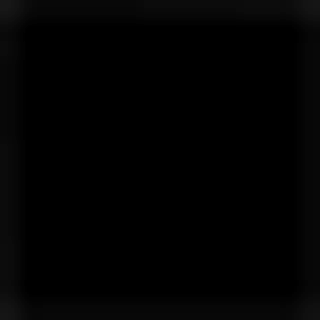


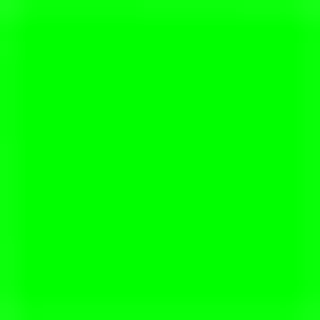


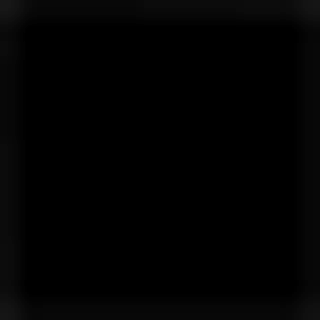

---- meta data -----
Clouds Impression
Peter Carolin
PNG
RGBA
Original size:  (320, 234)
Scaled size:  (320, 234)
-- images --



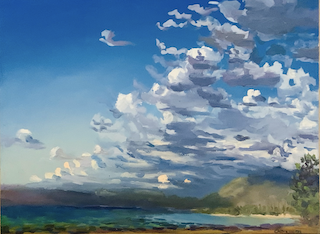


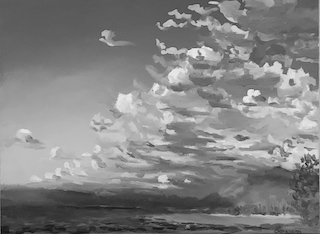


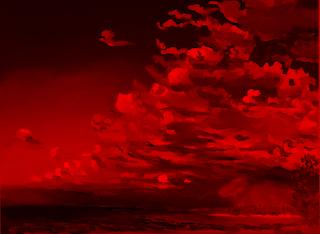

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
Original size:  (2792, 2094)
Scaled size:  (320, 240)
-- images --



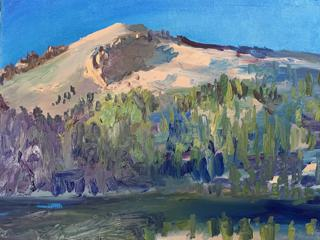


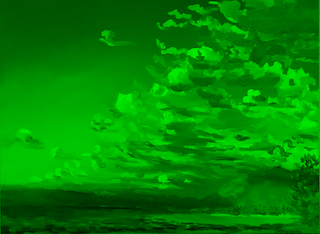


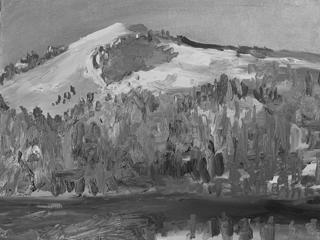


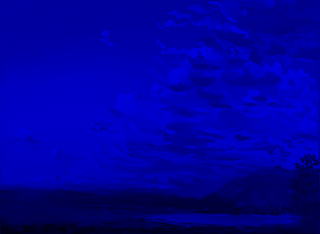


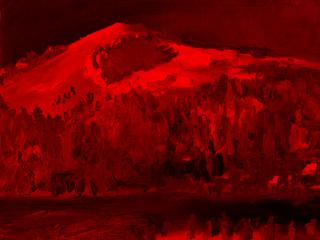


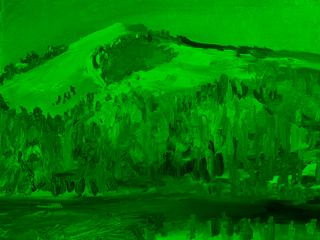


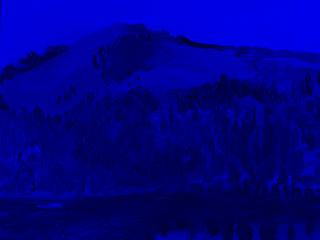

In [24]:
import concurrent.futures

# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # setup default images
    images = image_data()
    
    # Parallel Processsing
    # executor allocates threads, it considers core execution capability of machine
    with concurrent.futures.ThreadPoolExecutor() as executor:
        executor.map(process_image, images)  # order is not predictable
        
    print()

## Observing Parallel Computing and Threads
> You can observe Processes, CPU Percentage, and Threads with Tools on your machine. Common tools to monitor performance are Activity Monitor on MacOS or Task Manager on Windows.   

- This example is using ```top``` launched in VSCode Terminal. (mac)
- Try ```top -H``` for linux.
![](images/top.png)
    - PID is Process ID.  
    - COMMAND is task running on machine.  Python is activated when running this Jupyter notebook.
    - #TH is number of threads.   This increases from 15/1 to 18/1 on my machine when running python parallel computing example.


## Hacks
> AP Classroom. Provide answers and thoughts on theoritical question form college board Video in section 4.3.  They start at about the 9 minute mark.
- Example 1
- Example 2

> Data Structures.  Build a List Comprehension example
- list = [calc(item) for item in items]